# Logistic Regression

In [2]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import math
import pandas as pd

Let us consider the following data in `xps` and `xms`. These are features of two classes +1 and -1.

When we have two classes we usually call them +1 and -1 since it simplify a lot of formula greatly.

In [12]:
np.random.seed(12345)
nplus = 1000
nminus = 500

xps = np.random.randn(nplus) + 2.
xms = np.random.randn(nminus)

alln = nplus + nminus

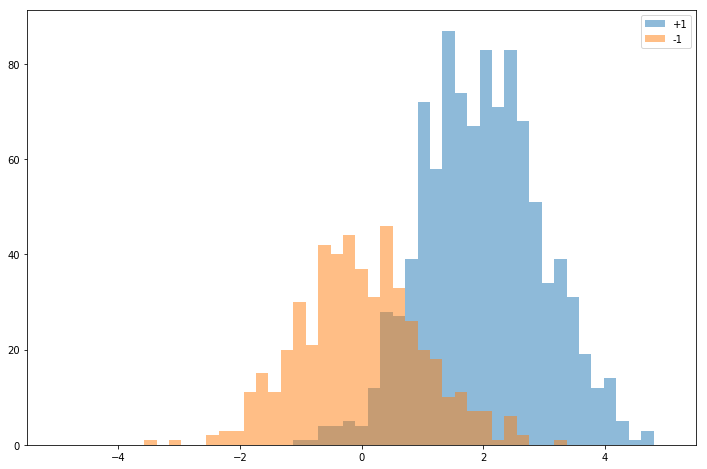

In [13]:
plt.figure(figsize=(12,8))
bins = np.linspace(-5,5,50)
hp, b1, p1 = plt.hist(xps, bins=bins, alpha=0.5, label='+1')
hm, b2, p2 = plt.hist(xms, bins=bins, alpha=0.5, label ='-1')
plt.legend()

1) First plot
$P(+1|x)$ vs $x$

`hp` and `hm` contains histogram value for class +1 and -1.

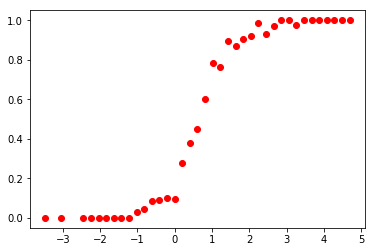

In [16]:
#I'm being nice for you
midpoints = (bins[1:] + bins[:-1])/2.0
prob = [ [m, x1/(x2+x1)] for m, x1, x2 in zip(midpoints, hp, hm) if x1+x2>0 ]
xs = [x for x,y in prob]
ys = [y for x,y in prob]
plt.plot(xs, ys, 'or')

2) Should you use linear regression $P(y = +1 | x) = mx + c$ to predict the probability? 


Why? If you have time try and see what happens.

## Theory


### Logistic Function

3) Plot with $s = -5 \ldots 5$ Then explain why it is preferred over linear function $ms +c$

$$\theta(s) = \frac{1}{1+e^{-s}}$$

4) Find $\theta(\infty)$ and $\theta(-\infty)$ and $\theta(0)$

5) Show that

$$1-\theta(s) = \theta(-s)$$

6) How should we compte $s$ from the features ?

7) Given that you use hypothesis $$ P_\vec{w}(1 | \vec{x}) = \theta(\vec{w}\cdot\vec{x}) $$
and that you only 2 classes (+1 and -1) what is

$$ P_\vec{w}(-1 | \vec{x})$$

8) What parameter parametrize your hypothesis?

9) Use the fact from 5) write what you found in 7 in a simpler form

$$
P_\vec{w}(y|\vec{x}) = \begin{cases}
    \ldots & y = 1 \\
    \ldots & y = -1
\end{cases}
$$

10) Use the fact that $y\in\{-1, 1\}$ and convince yourself that what you wrote above is just

$$ P_\vec{w}\left(y|\vec{x} \right) = \theta\left(y \times \left( \vec{w} \cdot \vec{x} \right) \right)$$

11) How do we distinguish a good hypothesis from bad hypothesis? (good $\vec{w}$ from bad $\vec{w}$)

12) What does likelihood represents?

13) Let us do one concrete example here.  Calculate the likelihood for $\vec{w}$ given these data point
$$\vec{w}_1 = (1,2,3)$$
- A: $y = 1$, $x=[1, -1]$
- B: $y = -1$, $x=[-2, 1]$ 

Don't forget to pad your feature.

In [17]:
def theta(s):
    return 1.0/(1.0 + np.exp(-s))

14) Is $\vec{w}_2 = (1,1,1)$ a better hypothesis?

15) What happen when we take log of the likelihood? Write down log likehood in terms of feature, weight and classes.

16) Does greater log likelihood indicate a better hypothesis? Or is it the other way around.

17) Write down our cost function. Do we want to maximize or minimize the cost function?

18) Turn what you found in 17 to minization problem.

19) Minimize it and try to debug it. You will most likely run into a bunch of numerical problems.

Hint: computer doesn't like '$e^x$ when $x$ is large. You may find numpy.clip useful

Hint: `log` function is typically inaccurate when the argument is near 1. Use `log1p` when you want to calculate `log(1+x)` for greater accuracy.

20) Once you are done. Compare you hypothesis with the probability getting from data.

21) For a new data point $x = 0.1$, what is the probability that it belongs to class $y=1$

## Logistic in Higher Dimension

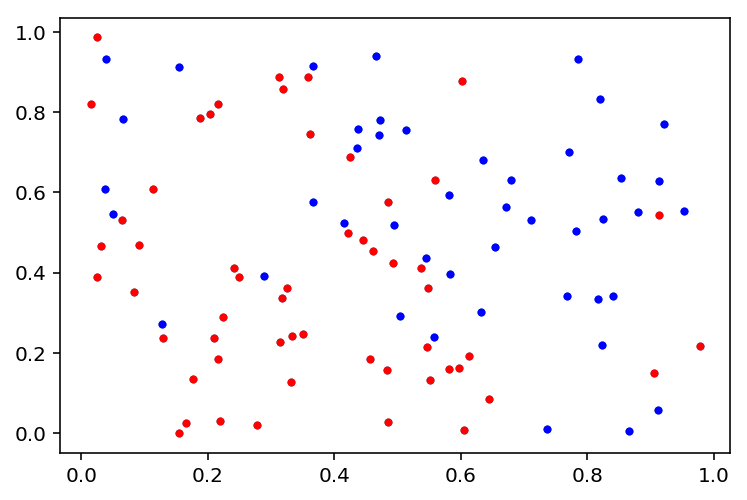

In [22]:
n = 100
np.random.seed(9999)
x1s = np.random.random(n)
x2s = np.random.random(n)
plt.plot(x1s, x2s, '.')
def sigm(x):
    return 1/(1+math.exp(-x))
ys = np.array([ np.random.rand() > sigm(5*x1 + 5*x2 - 5) for x1, x2 in zip(x1s, x2s)], float)
ys[ys==1] = 1
ys[ys==0] = -1

plt.plot(x1s[ys>0], x2s[ys>0], '.r')
plt.plot(x1s[ys<0], x2s[ys<0], '.b')

xs = np.vstack((x1s.T, x2s.T)) #this is how you stack them up vertically
pad_xs = np.vstack((np.ones(n), xs))
df = pd.DataFrame(data=pad_xs.T, columns=('x0', 'x1', 'x2'))

In [75]:
#display(df)

1) Perform a logistic regression on the given data. What is your $s$ now?

2) What is the equation for the line that represent $P(y=1|\vec{x})=0.5$. Recall that sigmoid(0)=0.5. Draw it along with the data.

3) Now try 0.3 and 0.7 line.

### Kernel Trick. More complicated Boundary.

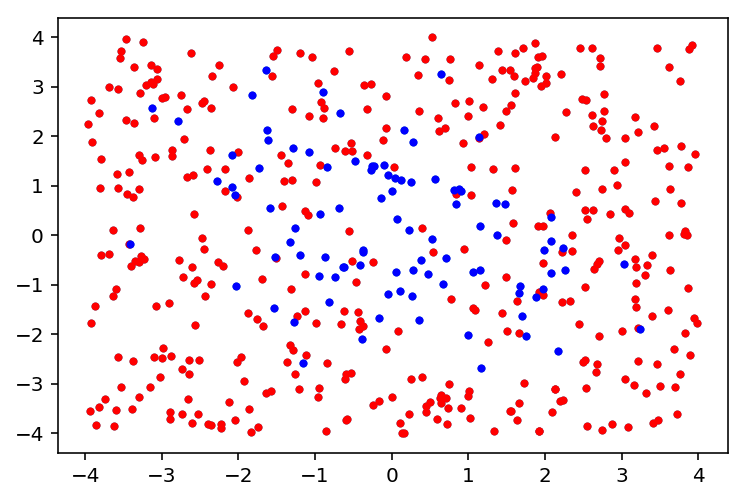

In [21]:
n = 500
np.random.seed(8888)
x1s = np.random.random(n)*8-4
x2s = np.random.random(n)*8-4
plt.plot(x1s, x2s, '.')

h = 0
k = 0
a = 1.5
b = 2
t = math.pi/6

z = ((x1s-h)*np.cos(t) + (x2s-k)*np.sin(t))**2/a**2 + ((x1s-h)*np.sin(t) - (x2s-k)*np.cos(t))**2/b**2 - 1

def sigm(x):
    return 1/(1+np.exp(-x))
    
p = sigm(z)
ps = np.random.random(n)
ys = np.sign(p-ps)

plt.plot(x1s[ys>0], x2s[ys>0], '.r')
plt.plot(x1s[ys<0], x2s[ys<0], '.b')

xs = np.vstack((x1s.T, x2s.T)) #this is how you stack them up vertically
pad_xs = np.vstack((np.ones(n), xs))
df = pd.DataFrame(data=pad_xs.T, columns=('x0', 'x1', 'x2'))